In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

train_samples = 5000
test_samples = 1000

x_train_small = x_train[:train_samples]
y_train_small = y_train[:train_samples]
x_test_small = x_test[:test_samples]
y_test_small = y_test[:test_samples]


/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128098 (\N{WOMANS BOOTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128087 (\N{DRESS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129509 (\N{COAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128095 (\N{ATHLETIC SHOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fi

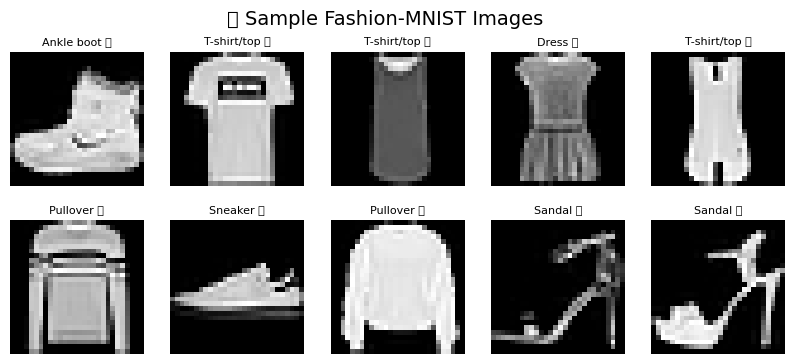

In [10]:
class_names = ["T-shirt/top 👕", "Trouser 👖", "Pullover 🧥", "Dress 👗", "Coat 🧥",
               "Sandal 👡", "Shirt 👔", "Sneaker 👟", "Bag 👜", "Ankle boot 👢"]

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_small[i], cmap="gray")
    plt.title(class_names[y_train_small[i]], fontsize=8)
    plt.axis("off")
plt.suptitle("👀 Sample Fashion-MNIST Images", fontsize=14)
plt.show()

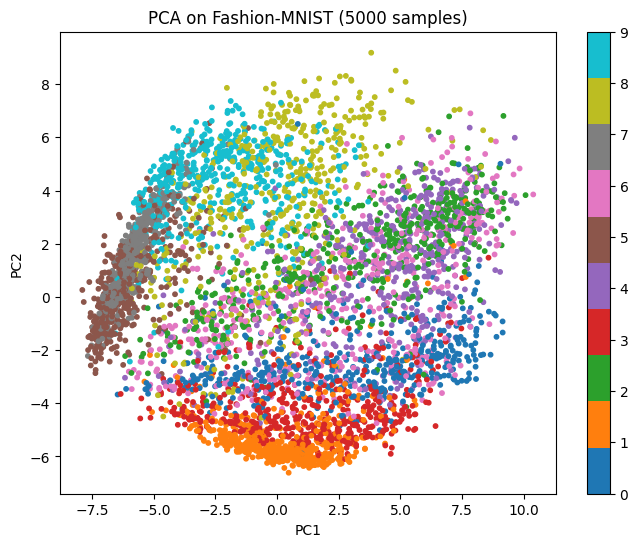

In [11]:
x_train_flat = x_train_small.reshape(train_samples, -1) / 255.0
x_test_flat = x_test_small.reshape(test_samples, -1) / 255.0

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flat)

plt.figure(figsize=(8,6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_small, cmap='tab10', s=10)
plt.colorbar()
plt.title('PCA on Fashion-MNIST (5000 samples)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [12]:
# 1. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(x_train_flat, y_train_small)
svm_preds = svm.predict(x_test_flat)

# 2. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_flat, y_train_small)
rf_preds = rf.predict(x_test_flat)

# 3. Neural Network (Deep Learning Model)
y_train_cat = to_categorical(y_train_small, 10)
y_test_cat = to_categorical(y_test_small, 10)

nn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn.fit(x_train_small, y_train_cat, epochs=3, batch_size=64, verbose=1)

nn_preds = np.argmax(nn.predict(x_test_small), axis=1)



Epoch 1/3


/opt/anaconda3/envs/tf-mac/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-16 19:19:40.578086: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-08-16 19:19:40.578196: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-08-16 19:19:40.578202: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-08-16 19:19:40.578537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-16 19:19:40.578547: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/re

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4478 - loss: 107.8305   
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7215 - loss: 22.4046 
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7311 - loss: 20.8871 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


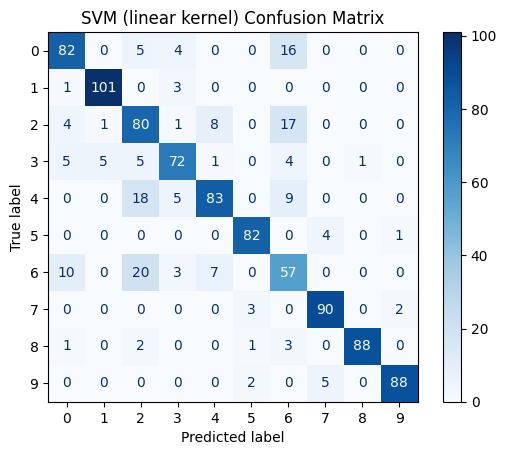

SVM (linear kernel) Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       107
           1       0.94      0.96      0.95       105
           2       0.62      0.72      0.66       111
           3       0.82      0.77      0.80        93
           4       0.84      0.72      0.78       115
           5       0.93      0.94      0.94        87
           6       0.54      0.59      0.56        97
           7       0.91      0.95      0.93        95
           8       0.99      0.93      0.96        95
           9       0.97      0.93      0.95        95

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.82      0.83      1000



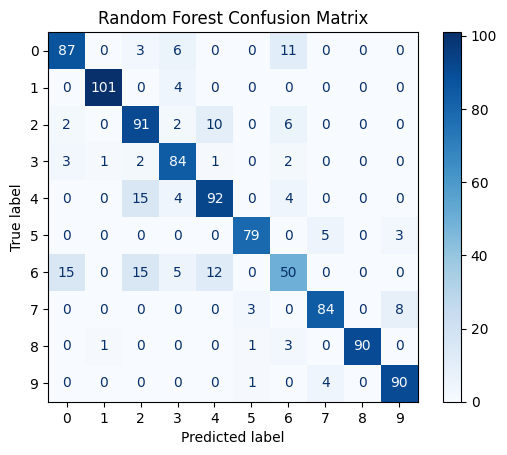

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.98      0.96      0.97       105
           2       0.72      0.82      0.77       111
           3       0.80      0.90      0.85        93
           4       0.80      0.80      0.80       115
           5       0.94      0.91      0.92        87
           6       0.66      0.52      0.58        97
           7       0.90      0.88      0.89        95
           8       1.00      0.95      0.97        95
           9       0.89      0.95      0.92        95

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



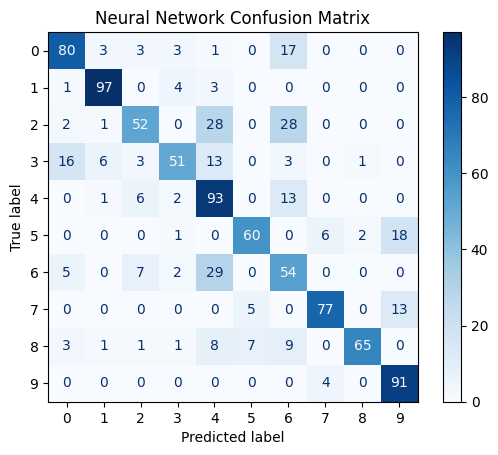

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       107
           1       0.89      0.92      0.91       105
           2       0.72      0.47      0.57       111
           3       0.80      0.55      0.65        93
           4       0.53      0.81      0.64       115
           5       0.83      0.69      0.75        87
           6       0.44      0.56      0.49        97
           7       0.89      0.81      0.85        95
           8       0.96      0.68      0.80        95
           9       0.75      0.96      0.84        95

    accuracy                           0.72      1000
   macro avg       0.75      0.72      0.72      1000
weighted avg       0.75      0.72      0.72      1000



In [21]:
results = {
    "SVM (linear kernel)": accuracy_score(y_test_small, svm_preds),
    "Random Forest": accuracy_score(y_test_small, rf_preds),
    "Neural Network": accuracy_score(y_test_small, nn_preds)
}

best_model, best_score = max(results.items(), key=lambda x: x[1])

print("📊 Model Accuracies:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

print("\n🏆 Best Model:", best_model)
print("✅ Accuracy:", best_score)


📊 Model Accuracies:
SVM (linear kernel): 0.8230
Random Forest: 0.8480
Neural Network: 0.7200

🏆 Best Model: Random Forest
✅ Accuracy: 0.848
